In [ ]:
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random
import os
from sklearn import metrics


In [ ]:
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/xclara.csv')

In [ ]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [ ]:
data.tail()

,V1,V2
2995,85.65280,-6.461061
2996,82.77088,-2.373299
2997,64.46532,-10.501360
2998,90.72282,-12.255840
2999,64.87976,-24.877310


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      3000 non-null   float64
 1   V2      3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [ ]:
data.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


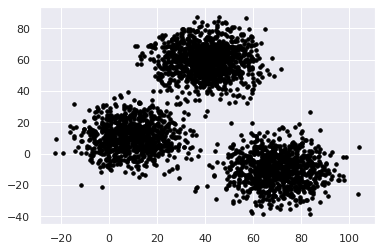

In [ ]:
f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=12);

In [ ]:
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [ ]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [ ]:
dist(np.array([[20,30,50],[1,2,5]]),np.array([[10,10,30],[3,5,1]]),ax=1)

array([30.        ,  5.38516481])

In [ ]:
# Number of clusters
k = 3

# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
print(C_x)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
print(C_y)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

print("Initial Centroids")
print(C)


[ 7 51 13]
[ 9 39 49]
Initial Centroids
[[ 7.  9.]
 [51. 39.]
 [13. 49.]]


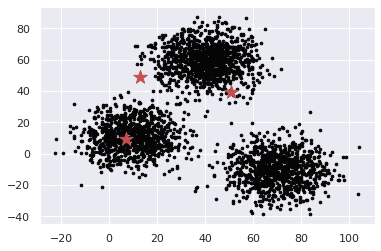

In [ ]:
plt.scatter(f1, 
            f2, 
            c='#050505', 
            s=7)

plt.scatter(C_x, 
            C_y, 
            marker='*', 
            s=200, 
            c='r');


In [ ]:
C

array([[ 7.,  9.],
       [51., 39.],
       [13., 49.]], dtype=float32)

In [ ]:
C_old = np.zeros(C.shape)

In [ ]:
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
len(X)

3000

In [ ]:
clusters = np.zeros(len(X))
clusters


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
error = dist(C,C_old,None)


In [ ]:
error

82.59539938761722

In [ ]:
from copy import deepcopy
# Loop will run till the error becomes zero
while error != 0:
    
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances   = dist(X[i], C)
        cluster     = np.argmin(distances)
        clusters[i] = cluster
        
    # Storing the old centroid values
    C_old = deepcopy(C)
    
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
    error = dist(C, C_old, None)

In [ ]:
clusters

array([0., 0., 0., ..., 1., 1., 1.])

(899, 2)
(952, 2)
(1149, 2)


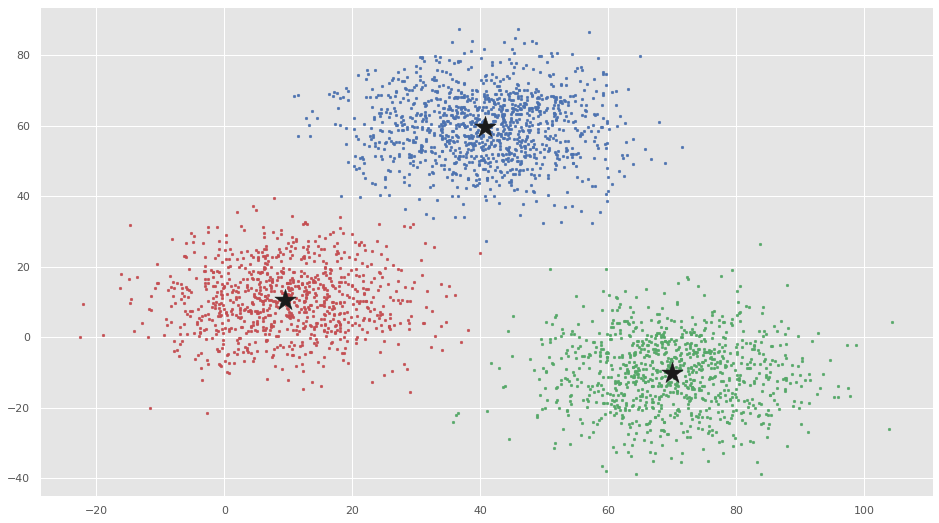

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        print(points.shape)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        
ax.scatter(C[:, 0], C[:, 1], marker='*', s=500, c='k');

##With sickit-learn

In [ ]:
#### Instantiate the kmeans with required number of clusters
k_clusters = 3
kmeans     = KMeans(n_clusters=k_clusters)
kmeans

KMeans(n_clusters=3)

In [ ]:
# Fitting the input data, Getting the cluster labels
y_kmeans = kmeans.fit_predict(X)
np.unique(y_kmeans)

array([0, 1, 2], dtype=int32)

In [ ]:
C

array([[  9.478045,  10.686052],
       [ 69.92419 , -10.119641],
       [ 40.683628,  59.715893]], dtype=float32)

In [ ]:
# Centroid values
centroids = kmeans.cluster_centers_
centroids

array([[ 69.92418447, -10.11964119],
       [ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ]])

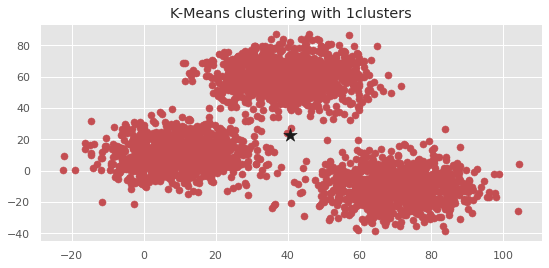

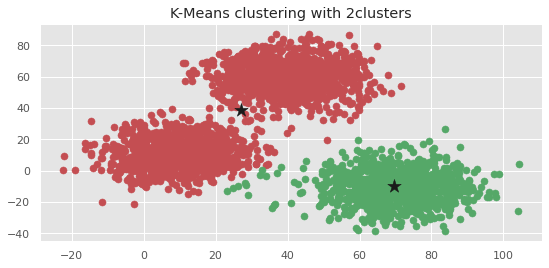

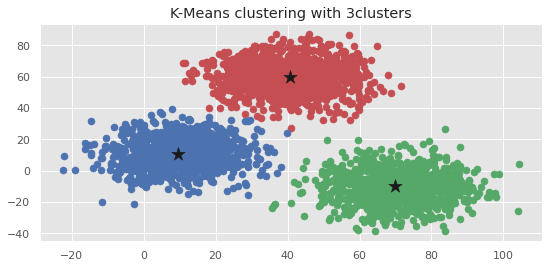

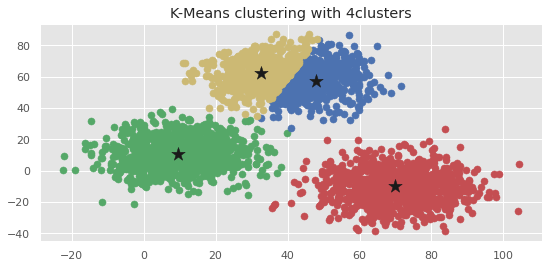

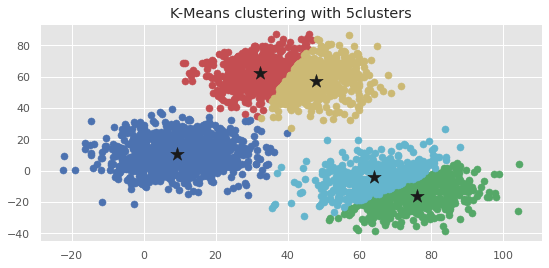

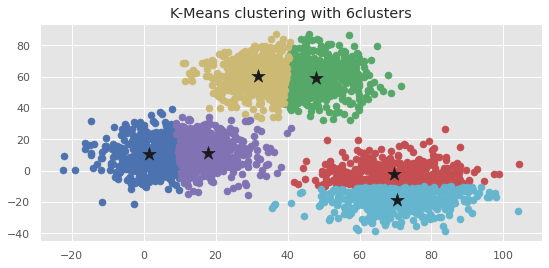

In [ ]:
total_no_unique_clusters = 6

for k_clusters in range(1, total_no_unique_clusters+1):
    fig = plt.figure(figsize=(9, 4)) 
    
    kmeans     = KMeans(n_clusters=k_clusters)

    # Fitting the input data, Getting the cluster labels
    y_kmeans = kmeans.fit_predict(X)

    # Centroid values
    centroids = kmeans.cluster_centers_

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    for i in range(k_clusters):

        plt.title('K-Means clustering with '+ str(i+1)+ 'clusters')
        plt.scatter( X[y_kmeans == i, 0], 
                    X[y_kmeans == i, 1], 
                    s = 50, 
                    c =colors[i], 
                    label = 'cluster '+ str(i))

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k');

In [ ]:
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [ ]:
X[0,0]

2.072345

In [ ]:
X[0,1]

-3.241693

In [ ]:
y_kmeans

array([2, 5, 2, ..., 0, 4, 4], dtype=int32)